# Linear Regression with one variable (Using gradient descent)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [2]:
def warmUpExercise():
    return(np.identity(5))

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#### Data Description

The dataset is provided by the coursera course machine learning by Andrew Ng. It is a two columns dataset of quantitative variables which describe population of a city for the first column and the second column is the profit of a food truck in that city.

#### Plotting the data

It is quite common to use the numpy library to do this simple linear regression. As such loading your data with the command (np.loadtxt) is quite convenient. However we use this mix of libraries because we want to set the columns name and play around a bit with our so love pandas library :). 

In [4]:
data1 = pd.read_csv('ex1data1.txt', sep=",", header=None) 

In [5]:
data1.columns = ['Population size', 'Profit']

In [6]:
data1.head()

,Population size,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


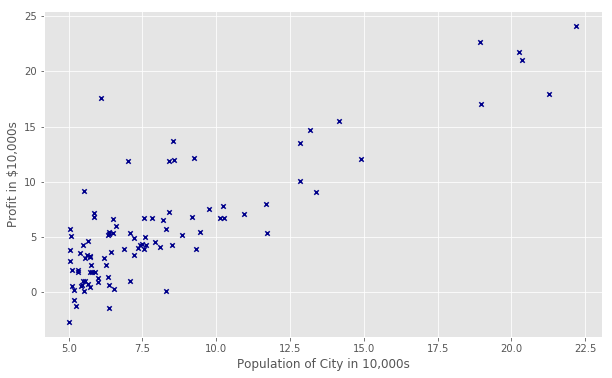

In [7]:
data1.plot(kind='scatter', x='Population size', y='Profit', figsize=(10, 6), color='darkblue', marker ='x')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

plt.show()

#### Some motivations

In [8]:
data1.corr()

,Population size,Profit
Population size,1.000000,0.837873
Profit,0.837873,1.000000


Running a simple correlation on our dataset we get a correlation of 0.83 between Population size and Profit. This indicates that there is a fairly strong positive relationship between our two variables. 

Let's see if we could materialize it by a simple mathematical formula who should tell us what happen to the profit in case we change the population size. This equals to solving a simple linear regression problem with one variable which in our case is the population size.

In order terms we want to fit a linear regression with parameters $\theta$ to our dataset
using gradient descent.

The objective of linear regression is to minimize the cost function :
$J(\theta) = \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$

where the hypothesis $h_{\theta}(x)$ is given by the linear model : 
$h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x_1$

In [9]:
X = np.c_[np.ones(data1.shape[0]),data1[['Population size']]]
y = np.c_[data1[['Profit']]]

#### Gradient Descent

In [10]:
m = len(y) # number of training examples

theta = np.zeros((2,1)) # initialize fitting parameters
iterations = 1500; # initialize number of iterations
alpha = 0.01;  # initialize the learning rate

#### Computing the cost

In [11]:
# computeCost(X, y, theta) this function computes the cost of using theta as the
# parameter for linear regression to fit the data points in X and y
def computeCost(X, y, theta):
    m = len(y)
    J = 0

    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [12]:
# Compute and display initial cost with theta all zeros
computeCost(X, y, theta)

32.072733877455676

In [13]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,1))
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

In [14]:
# Run gradient descent:
# Compute theta
theta, costJ = gradientDescent(X, y, theta, alpha, iterations);

# Print theta to screen
print(theta.ravel())

[-3.63029144  1.16636235]


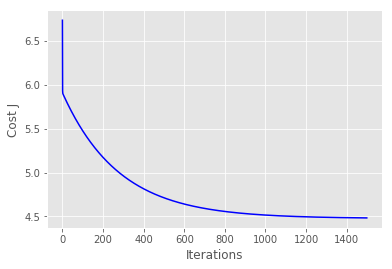

In [15]:
# Display gradient descent's result
plt.plot(costJ, 'b')
plt.ylabel('Cost J')
plt.xlabel('Iterations');

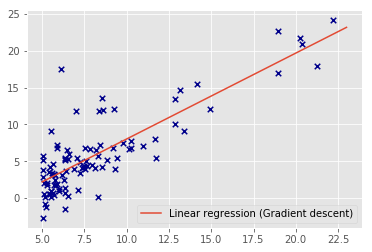

In [16]:
xx = np.arange(5,25,2)
yy = theta[0]+theta[1]*xx

plt.scatter(X[:,1], y, s=30, c='darkblue', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')
plt.legend(loc=4);

In [17]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


References :

<A href='http://nbviewer.ipython.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%201%20-%20Linear%20Regression.ipynb'>Exercise 1 - Linear Regression by Jordi Warmenhoven</A><BR>
    
<A href='https://www.coursera.org/learn/machine-learning/home/welcome'> Coursera Machine Learning by Andrew Ng </A><BR>
    
    
Click and Enjoy more there !

# Thank you 